In [57]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import plotly.graph_objects as go
import plotly.express as px
import missingno as msno
from ipywidgets import interact, widgets
from ydata_profiling import ProfileReport
%matplotlib inline 

In [58]:
# Função para carregar CSV e XLS da Pasta:

amazon = pd.read_csv("Z:/01. PESSOAL/BRUNO/VScode/Amazon/Amazon Echo 2 Reviews.csv")


print("Dados de Amazon:", amazon.shape)
amazon.info()

Dados de Amazon: (6855, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Pageurl              6855 non-null   object 
 1   Title                6855 non-null   object 
 2   Review Text          6850 non-null   object 
 3   Review Color         6855 non-null   object 
 4   User Verified        6641 non-null   object 
 5   Review Date          6855 non-null   object 
 6   Review Useful Count  28 non-null     float64
 7   Configuration Text   6855 non-null   object 
 8   Rating               6855 non-null   int64  
 9   Declaration Text     6 non-null      object 
dtypes: float64(1), int64(1), object(8)
memory usage: 535.7+ KB


In [59]:
#Verificando estatisticas descritivas

amazon.describe()

,Review Useful Count,Rating
count,28.000000,6855.000000
mean,17.071429,4.207002
std,58.266265,1.272551
min,2.000000,1.000000
25%,2.000000,4.000000
50%,2.000000,5.000000
75%,2.000000,5.000000
max,284.000000,5.000000


In [60]:
#Usando o profile report para verificar o dataframe
amazon.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 10.41it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

No tratamento de dados iremos retirar as colunas que estão com maior quantidade de dados faltantes.
Review Useful Count = 6827 faltantes e Declaration Text = 6849
Uma vez que essas colunas não irão atrapalhar em nossa analise iremos retirar-las para uma melhor abordagem.

In [ ]:
#Tratamento de dados

amazon.drop(columns=['Review Useful Count','Declaration Text'], inplace=True)
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6855 entries, 0 to 6854
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pageurl             6855 non-null   object
 1   Title               6855 non-null   object
 2   Review Text         6850 non-null   object
 3   Review Color        6855 non-null   object
 4   User Verified       6641 non-null   object
 5   Review Date         6855 non-null   object
 6   Configuration Text  6855 non-null   object
 7   Rating              6855 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 428.6+ KB


Apos a retirada das colunas, iremos retirar os dados que estão nulos referentes ao User Verified, pois ao utilizarmos apenas os usuarios que são verificados temos uma excelente amostra

In [62]:
#removendo os valores nulos, definindo um subset
amazon = amazon.dropna(subset=['User Verified'])
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6641 entries, 0 to 6854
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Pageurl             6641 non-null   object
 1   Title               6641 non-null   object
 2   Review Text         6636 non-null   object
 3   Review Color        6641 non-null   object
 4   User Verified       6641 non-null   object
 5   Review Date         6641 non-null   object
 6   Configuration Text  6641 non-null   object
 7   Rating              6641 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 466.9+ KB


In [63]:
#calculando o dados descritivos do dataset
amazon.describe()

,Rating
count,6641.000000
mean,4.216985
std,1.263024
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Como podemos ver pela analise descritiva, o produto possui uma boa aceitação visto que sua media de Rating esta em 4.21 em uma escala de 1 a 5.

Dito isso podemos partir para analises mais robustas do produto.


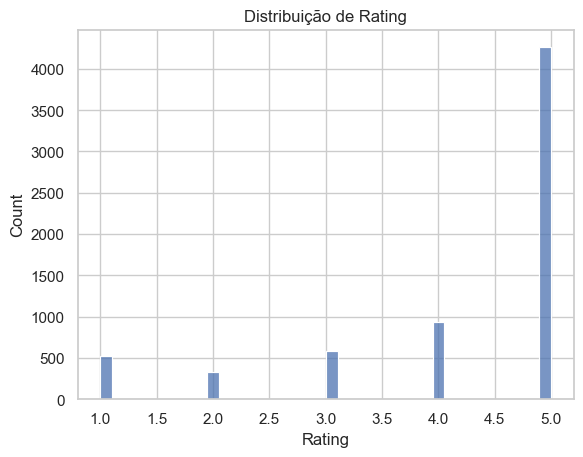

In [64]:
#Histrograma de rating

sns.histplot(data=amazon, x='Rating')
plt.title('Distribuição de Rating')
plt.show()

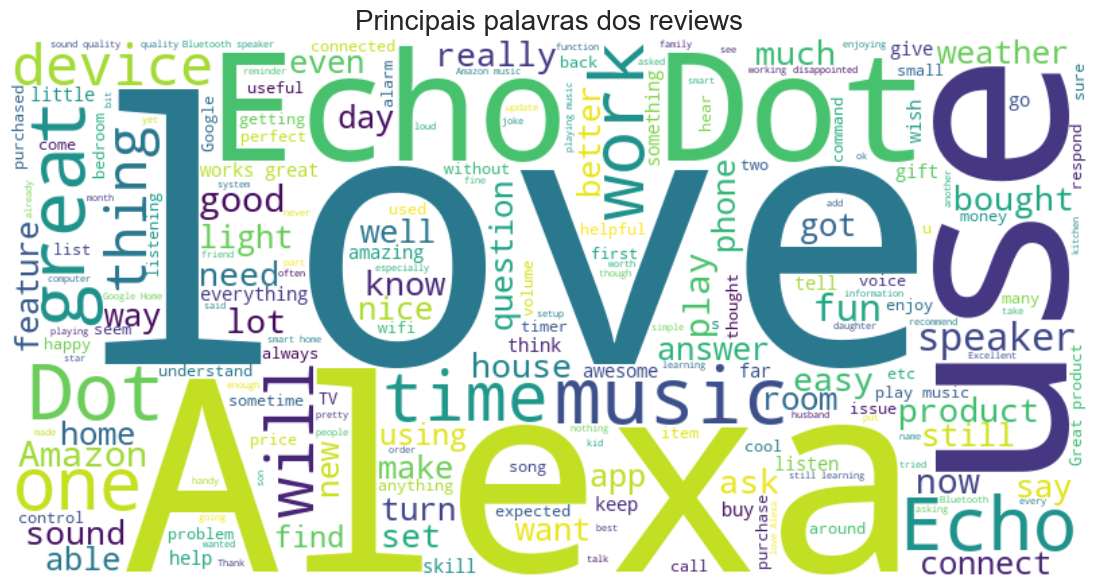

In [65]:
from wordcloud import WordCloud
#criação de uma Word Cloud para verificar as principais palavras do Review Text

# Converte todos os valores para string
amazon['Review Text'] = amazon['Review Text'].astype(str)

# Concatenar todos os textos em uma única string
text = ' '.join(amazon['Review Text'])

#  Criar a Wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text)

#  Plotar
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Principais palavras dos reviews', fontsize=20)
plt.show()

In [66]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Criar o analisador de sentimentos
sia = SentimentIntensityAnalyzer()

# Criar função para determinar sentimento baseado no 'compound'
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

# Aplicar nos reviews
amazon['Sentimento'] = amazon['Review Text'].apply(get_sentiment)

# Visualizar
amazon[['Review Text', 'Rating', 'Sentimento']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Review Text,Rating,Sentimento
0,Not great speakers,3,Negativo
1,Great little gagit,4,Positivo
2,Awesome 👏🏽,5,Positivo
3,Love my Echo,5,Positivo
4,Great device,5,Positivo


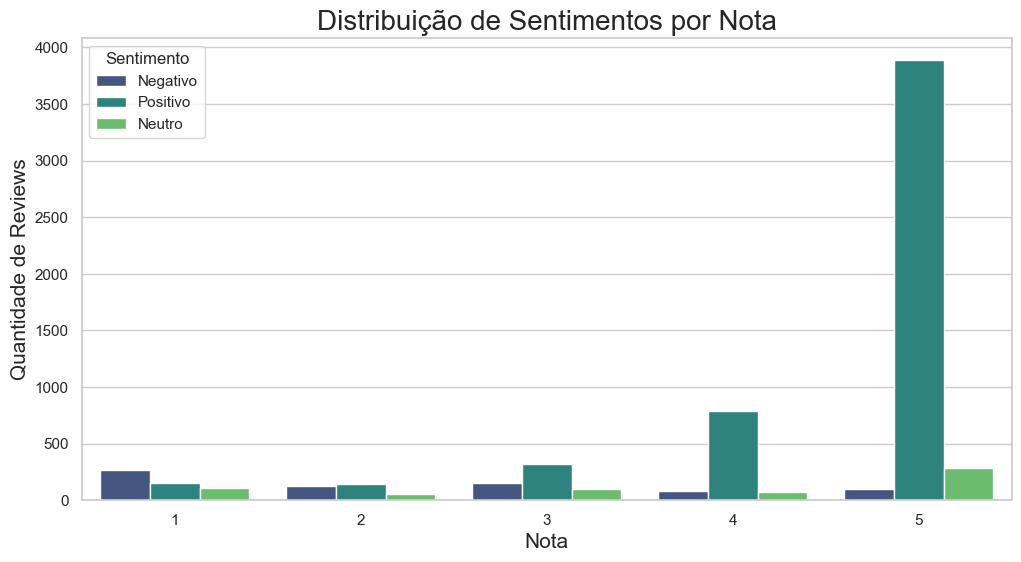

In [67]:
# Configurar o estilo
sns.set(style='whitegrid')

# Criar o gráfico
plt.figure(figsize=(12,6))
sns.countplot(data=amazon, x='Rating', hue='Sentimento', palette='viridis')

# Ajustes finais
plt.title('Distribuição de Sentimentos por Nota', fontsize=20)
plt.xlabel('Nota', fontsize=15)
plt.ylabel('Quantidade de Reviews', fontsize=15)
plt.legend(title='Sentimento')
plt.show()

Verificar se a cor do produto influencia a nota (Rating).

In [68]:
# Agrupar por cor e calcular a média de nota
rating_por_cor = amazon.groupby('Review Color')['Rating'].mean().sort_values(ascending=False)

# Visualizar
rating_por_cor.head()


Review Color
Black    4.222901
White    4.194861
Name: Rating, dtype: float64

C:\Users\bruno\AppData\Local\Temp\ipykernel_9812\4252349794.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




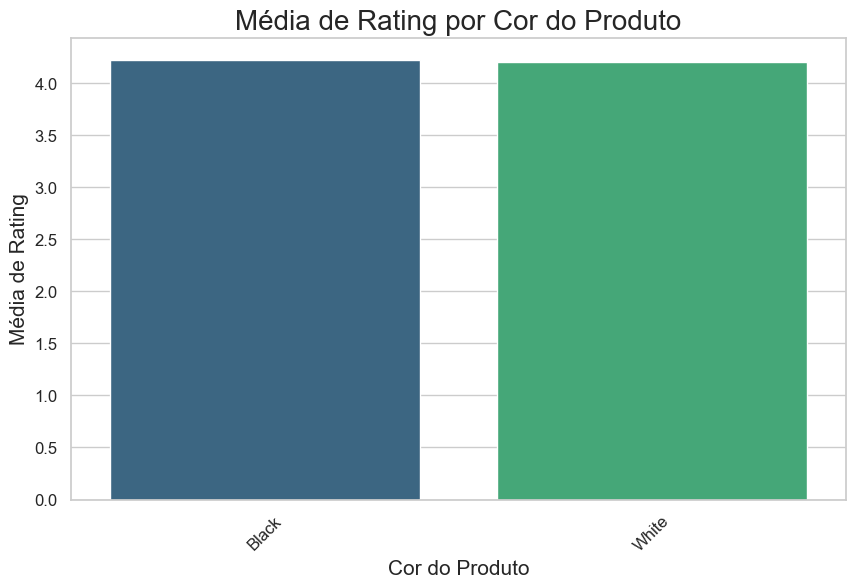

In [69]:
# Criar o gráfico
plt.figure(figsize=(10,6))
sns.barplot(x=rating_por_cor.index, y=rating_por_cor.values, palette='viridis')

# Ajustes finais
plt.title('Média de Rating por Cor do Produto', fontsize=20)
plt.xlabel('Cor do Produto', fontsize=15)
plt.ylabel('Média de Rating', fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Análise Temporal das Avaliações (Review Date)

In [70]:
# Transformar a coluna para tipo datetime
amazon['Review Date'] = pd.to_datetime(amazon['Review Date'], errors='coerce')

# Conferir
print(amazon['Review Date'].head())

0   2017-10-03
1   2017-09-26
2   2017-09-08
3   2017-10-19
4   2017-09-17
Name: Review Date, dtype: datetime64[ns]


In [71]:
# Criar coluna ano-mês
amazon['Ano_Mes'] = amazon['Review Date'].dt.to_period('M')

In [72]:
# Agrupar e calcular média
rating_por_mes = amazon.groupby('Ano_Mes')['Rating'].mean()

# Visualizar
print(rating_por_mes.head())

Ano_Mes
2017-09    4.245246
2017-10    4.154405
Freq: M, Name: Rating, dtype: float64


Prever a Nota do Produto a partir do Texto (Review Text)

Rating
4    3410
5    3410
2    3410
1    3410
3    3410
Name: count, dtype: int64
              precision    recall  f1-score   support

           1       0.53      0.61      0.57       105
           2       0.28      0.31      0.29        67
           3       0.35      0.45      0.40       116
           4       0.32      0.44      0.37       188
           5       0.90      0.77      0.83       853

    accuracy                           0.66      1329
   macro avg       0.48      0.52      0.49      1329
weighted avg       0.71      0.66      0.68      1329



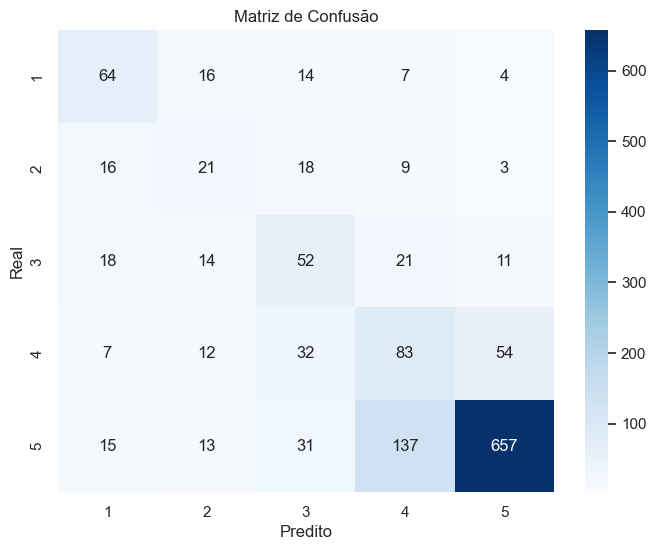

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

X = amazon['Review Text']
y = amazon['Rating']

# Primeiro, vetorizar o texto novamente (caso tenha refeito o split)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Dividir novamente entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Aplicar Oversampling no treino
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Confirmar o novo balanço
print(pd.Series(y_train_resampled).value_counts())

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Prever
y_pred = model.predict(X_test)

# Avaliação
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar matriz de confusão
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

construir um pipeline completo

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline que aceita oversampling
from imblearn.over_sampling import RandomOverSampler

              precision    recall  f1-score   support

           1       0.53      0.61      0.57       105
           2       0.28      0.31      0.29        67
           3       0.35      0.45      0.40       116
           4       0.32      0.44      0.37       188
           5       0.90      0.77      0.83       853

    accuracy                           0.66      1329
   macro avg       0.48      0.52      0.49      1329
weighted avg       0.71      0.66      0.68      1329



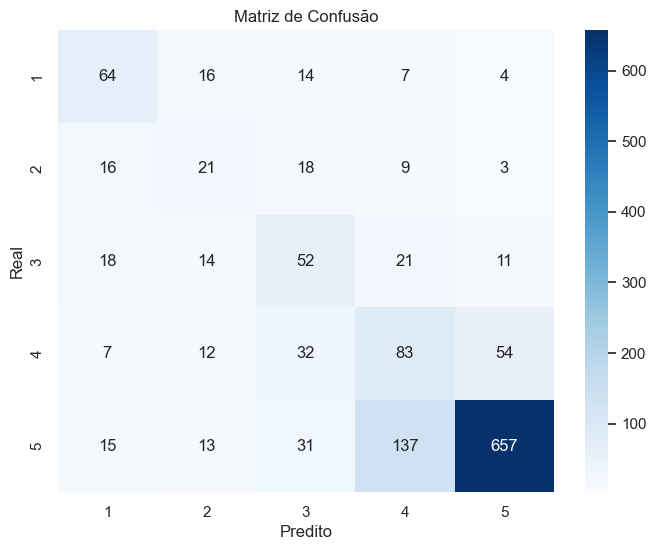

In [75]:
# Corrigir textos vazios
amazon['Review Text'] = amazon['Review Text'].fillna('').astype(str)
amazon['Rating'] = amazon['Rating'].astype(int)

# Separar variáveis
X = amazon['Review Text']
y = amazon['Rating']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline = ImbPipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('oversample', RandomOverSampler(random_state=42)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

pipeline.fit(X_train, y_train)

print(classification_report(y_test, y_pred))

# Matriz de confusão
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()